# MINST DATASET

### Load and split the data

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', version=1)

C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including:

- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels


In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).To see one digit of the dataset:

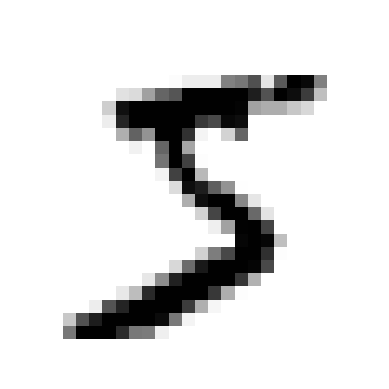

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Access the first row of the DataFrame and convert it to a NumPy array
some_digit = X.iloc[0].to_numpy()  # or X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [7]:
y[0] #If we search on the correspondent label, we see that the digit is the number 5. 

# Careful! The lebel is a string

'5'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

### Train individual classifiers

- Random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Extra-trees classifier

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_clf.fit(X_train, y_train)


ExtraTreesClassifier(random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Combine them into ensamble

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier. Somewhat surprisingly, this voting classifier often achieves a higher accuracy than the
best classifier in the ensemble.

In [19]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('et', et_clf), ('gb', gb_clf),('ada', ada_clf), ('dt',dt_clf)],
    voting='hard'  # Start with hard voting
)
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))])

In [20]:
## Evaluate them on the validation set

from sklearn.metrics import accuracy_score
for clf in (rf_clf, et_clf, gb_clf, ada_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

RandomForestClassifier 0.9632857142857143
ExtraTreesClassifier 0.9675
GradientBoostingClassifier 0.9426428571428571
AdaBoostClassifier 0.7202142857142857
DecisionTreeClassifier 0.8609285714285714
VotingClassifier 0.9594285714285714


In [21]:
## Evaluate the best ones on the test set

from sklearn.metrics import accuracy_score
for clf in (rf_clf, et_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9662142857142857
ExtraTreesClassifier 0.9683571428571428
VotingClassifier 0.9621428571428572


For an ensemble method to be effective, the individual models should make different errors on the dataset. If the models are too similar in their predictions or errors, the ensemble might not significantly improve performance. What is likely to have happened in this case is that the performance of some models (especially AdaBoost and Decision Tree) is significantly lower than others, which might be pulling down the ensemble's overall performance.

### PCA

In [23]:
# Apply PCA on the training data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # for example, retain 95% of variance
X_train_pca = pca.fit_transform(X_train)

In [24]:
pca.explained_variance_ratio_

array([0.09716959, 0.07160072, 0.06136474, 0.05401034, 0.04896001,
       0.04349903, 0.03292609, 0.02890285, 0.02758631, 0.0234022 ,
       0.02109293, 0.0205085 , 0.01712532, 0.01693285, 0.01578986,
       0.01483279, 0.01321384, 0.01278633, 0.01191887, 0.01150325,
       0.01062898, 0.01007429, 0.0096451 , 0.00914093, 0.00885534,
       0.00836414, 0.00807306, 0.00789439, 0.00736455, 0.00688904,
       0.00658338, 0.00641595, 0.00598263, 0.00584242, 0.00564101,
       0.00545678, 0.00504243, 0.00487314, 0.00478155, 0.004698  ,
       0.00452989, 0.00441127, 0.00418316, 0.00392842, 0.00383288,
       0.00374673, 0.00361302, 0.00347716, 0.00338292, 0.00319969,
       0.00315332, 0.00309044, 0.00295617, 0.00287518, 0.00282049,
       0.00269909, 0.00267935, 0.00255387, 0.00254511, 0.00243192,
       0.00240354, 0.00239316, 0.0022972 , 0.00222288, 0.00214058,
       0.00206896, 0.00203339, 0.00193606, 0.00190583, 0.00188619,
       0.00186502, 0.00180307, 0.00176535, 0.00173159, 0.00164

In [26]:
print(X_train_pca.shape) # Now there are 153 features instead of 784

(42000, 153)


In [27]:
X_test_pca = pca.transform(X_test)

In [ ]:
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

from sklearn.metrics import accuracy_score
for clf in (rf_clf, et_clf, gb_clf):
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9429285714285714
ExtraTreesClassifier 0.9451428571428572


It is also possible to decompress the reduced dataset back to 784 dimensions by
applying the inverse transformation of the PCA projection. 

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)